In [4]:
# Data preprocessing
#0 denotes no priors. gt0 denotes greater than 0 priors
#Priors = 0 

import csv
from hypothesis_test import *
from kardis_test import *
from mg_calculator import *
from q_finder import *
from graph_distributions import *

file = open(r"Future/compas-scores-two-years-corrected.csv", mode='r', encoding='utf-8-sig')
csvreader = csv.reader(file)
rowlist = [row for row in csvreader]
for category in rowlist[0]:
    index = rowlist[0].index(category)
    exec(category + " = [row[index] for row in rowlist[1:]]")
file.close()

priors_0_scores = [score_text[x] for x in range(len(score_text)) if int(priors_count[x]) == 0 and 
                   sex[x] == 'Female']


priors_gt0_scores = [score_text[x] for x in range(len(score_text)) if int(priors_count[x]) > 0 and
                     sex[x] == 'Female']

Null hypothesis (proposed distribution): [0.706, 0.29400000000000004]

Proposed distribution rejected at alpha = 0.05. Kardis = 2.4487299782643e-87.
Any plausible distribution must boost probability over the given distribution by 2.04187478586107e+85, and will therefore have a minimum probability of 5.09305201462288e-5.
Closest plausible distribution: [0.34549497733175566, 0.6545050226682443]


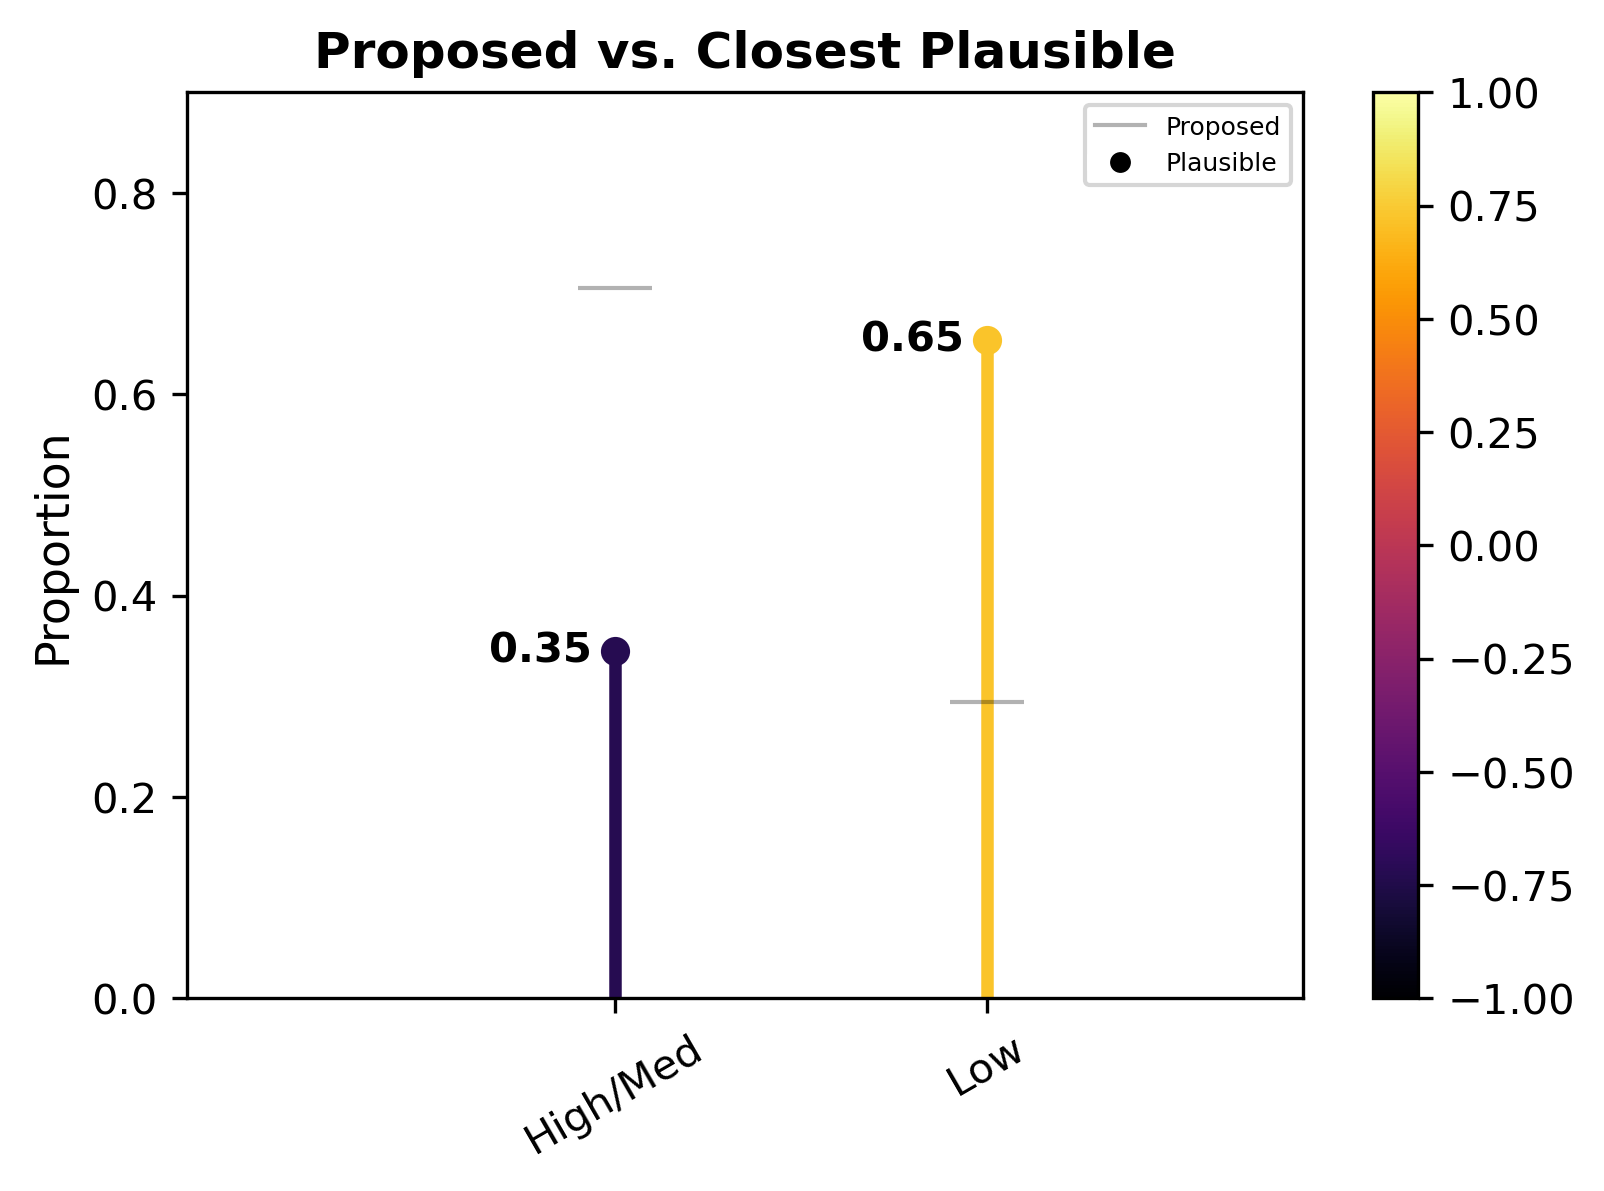

In [5]:
# Setup and Experiments
priors_0_scores = list(filter(lambda x: not x == 'N/A', priors_0_scores))
priors_0_binary = [x if x =='Low' else 'High/Med' for x in priors_0_scores]

#~70.6% of first offenders recidivate within two years according to the Florida Dept. of Corrections
null_props = [.706,1-.706]

print("Null hypothesis (proposed distribution): " + str(null_props) + "\n")

q_null_props = hypothesis_test(priors_0_binary,\
                ['High/Med', 'Low'],\
                alpha = 0.05, hypothesis = null_props)[4]

graph_distributions(q_null_props,\
                    [('High/Med'),('Low')],
                    hypothesis=null_props, xl = [('High/Med'),('Low')], 
                    filename=r"Results/compas_female_priors_0_demo.pdf")

Null hypothesis (proposed distribution): [0.294, 0.706]

Proposed distribution rejected at alpha = 0.05. Kardis = 1.58221998500568e-24.
Any plausible distribution must boost probability over the given distribution by 3.16011682786452e+22, and will therefore have a minimum probability of 1.51501658717715e-5.
Closest plausible distribution: [0.4163326057153977, 0.5836673942846022]


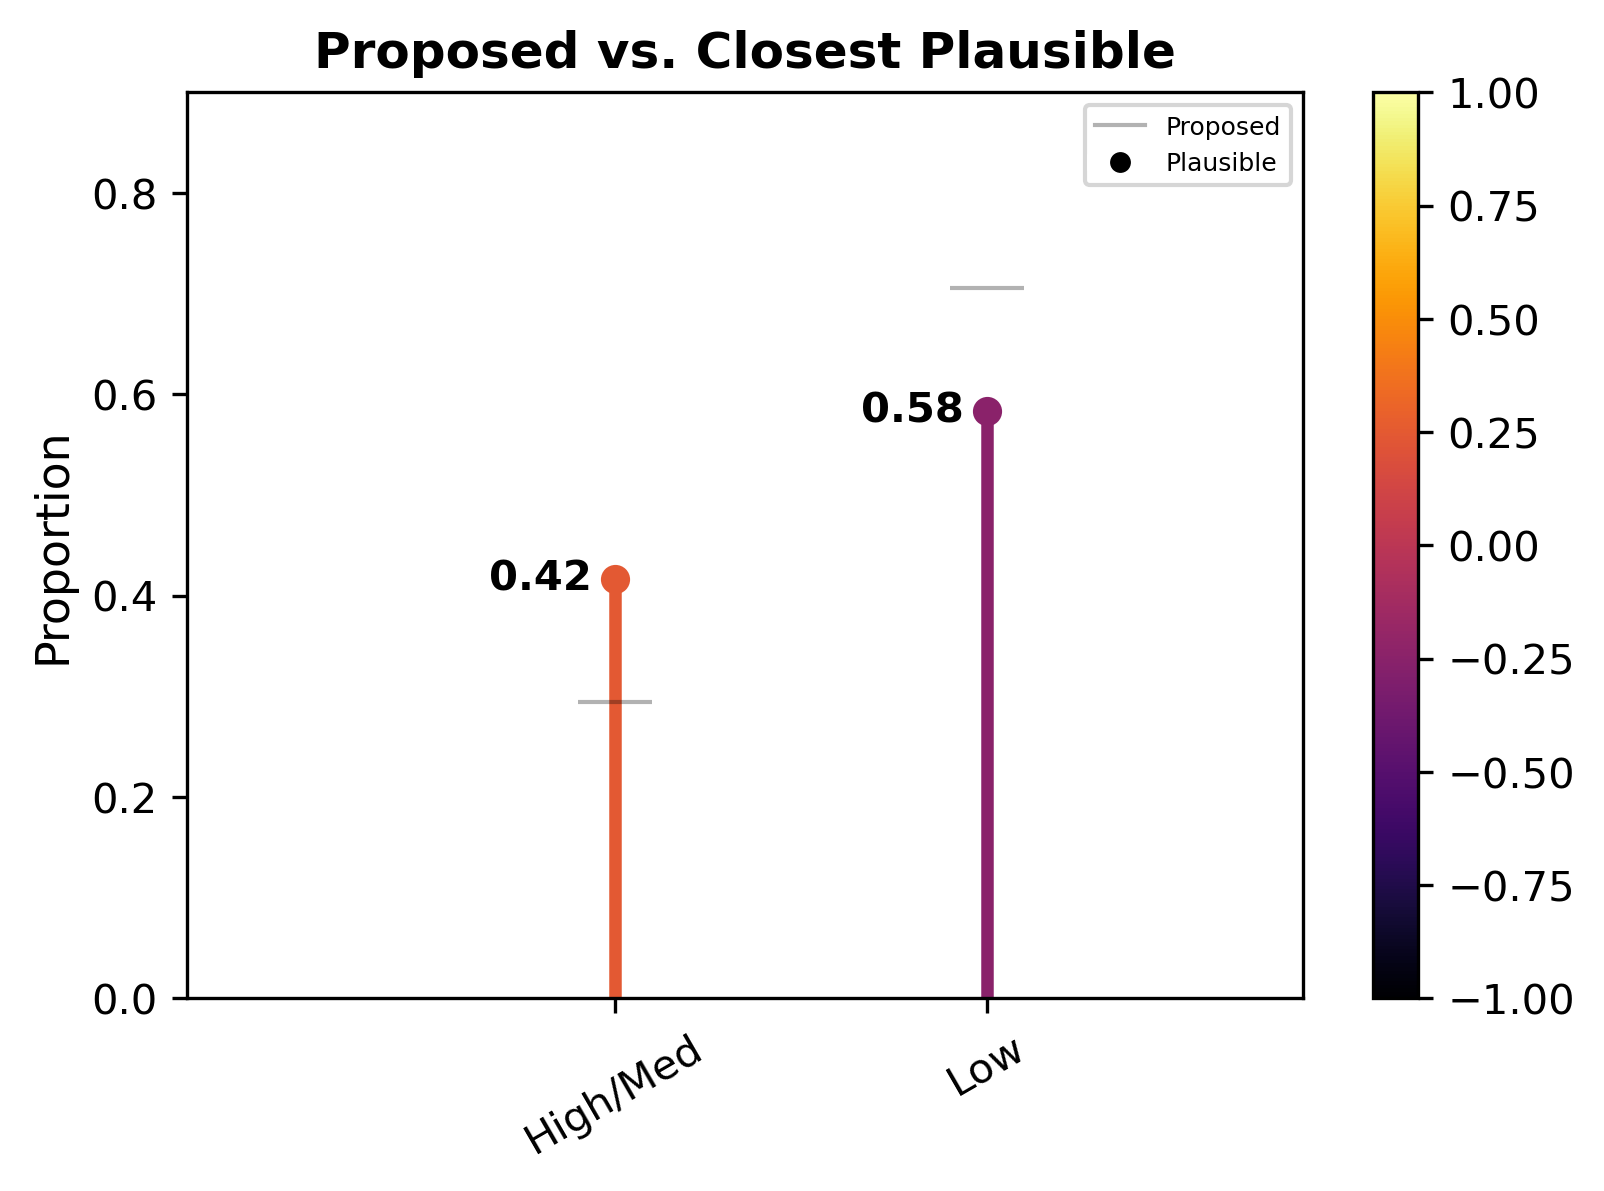

In [6]:
# Setup and Experiments
priors_gt0_scores = list(filter(lambda x: not x == 'N/A', priors_gt0_scores))
priors_gt0_binary = [x if x =='Low' else 'High/Med' for x in priors_gt0_scores]

#~29.4% of first offenders recidivate within two years according to the Florida Dept. of Corrections
null_props = [.294,1-.294]

print("Null hypothesis (proposed distribution): " + str(null_props) + "\n")

q_null_props = hypothesis_test(priors_gt0_binary,\
                ['High/Med', 'Low'],\
                alpha = 0.05, hypothesis = null_props)[4]

graph_distributions(q_null_props,\
                    [('High/Med'),('Low')],
                    hypothesis=null_props, xl = [('High/Med'),('Low')], 
                    filename=r"Results/compas_female_priors_gt0_demo.pdf")